In [1]:
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
import time

138.430997671 60.8595704834 (112, 92)


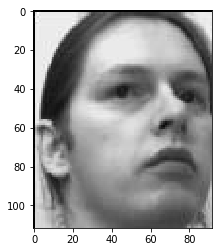

In [2]:
im = Image.open("image/umist_cropped.jpg")
data_orig = np.array(im)

ws = (112,92)
data = data_orig[ws[0]:2*ws[0],ws[1]:ws[1]*2]
print(np.mean(data), np.std(data), data.shape)
plt.imshow(data, cmap='gray')
plt.show()

In [3]:
def sada_mask(X, mask, W, I, K, gamma_shape, gamma_scale, max_iter):
    X = X * mask
    A_t = np.ones((W,I))*gamma_shape
    B_t = np.ones((W,I))*gamma_scale
    A_v = np.ones((I,K))*gamma_shape
    B_v = np.ones((I,K))*gamma_scale
    
    T = np.random.gamma(A_t,B_t)
    V = np.random.gamma(A_v,B_v)
    
    last_time = time.time()
    
    for n in range(max_iter):

        x_head = T.dot(V)
        for k in range(I):
            p = T[ :, [k]].dot(V[ [k], :])/x_head
            S = np.random.binomial(X, p)
            
            alpha_T = A_t[:,k] + np.sum(S, axis = 1)
            alpha_V = A_v[k,:] + np.sum(S, axis = 0)
            
            beta_T = 1./(B_t[:,k] + (np.einsum("ij,j->i",mask, V[k,:])))
            beta_V = 1./(B_v[k,:] + (np.einsum("ij,i->j",mask, T[:,k])))
            
            T[:,k] = np.random.gamma(alpha_T, beta_T)
            V[k,:] = np.random.gamma(alpha_V, beta_V)
            
        if n % 50 == 0:
            mean_diff = np.mean(np.abs(X - np.dot(T,V)))
            now = time.time()
            diff_time = now - last_time
            print("diff - time: %s -- epoch %d: loss: "% (diff_time, n), mean_diff)
            last_time = now
    return T, V

In [4]:
#Initialization
X = data
W = X.shape[0]
K = X.shape[1]
I = 100

data_variance = (np.std(X)/I)**2
data_mean = np.mean(X)/I/2.5

gamma_scale = data_variance/data_mean # b/sqrt(a) == std
gamma_shape = data_mean/gamma_scale

mask = np.ones((W,K)).astype(np.uint8)
mask[30:50,35:60] = 0

T, V = sada_mask(X, mask, W, I, K, gamma_shape, gamma_scale, 1000)

diff - time: 0.09922409057617188 -- epoch 0: loss:  504.151027111
diff - time: 4.7593841552734375 -- epoch 50: loss:  295.58910568
diff - time: 4.728496789932251 -- epoch 100: loss:  187.907387914
diff - time: 4.610327243804932 -- epoch 150: loss:  128.430124318
diff - time: 4.601762056350708 -- epoch 200: loss:  89.7266197656
diff - time: 4.588534832000732 -- epoch 250: loss:  65.8912770807
diff - time: 4.572266101837158 -- epoch 300: loss:  51.0066335153
diff - time: 4.568112850189209 -- epoch 350: loss:  38.6514191234
diff - time: 4.567253112792969 -- epoch 400: loss:  31.0698948112
diff - time: 4.549726963043213 -- epoch 450: loss:  25.4136925012
diff - time: 5.012602090835571 -- epoch 500: loss:  21.8093011135
diff - time: 4.730203151702881 -- epoch 550: loss:  21.4825349258
diff - time: 4.720882892608643 -- epoch 600: loss:  16.3671277053
diff - time: 4.701762676239014 -- epoch 650: loss:  14.2019138407
diff - time: 4.771283388137817 -- epoch 700: loss:  14.312881023
diff - time:

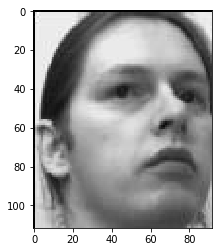

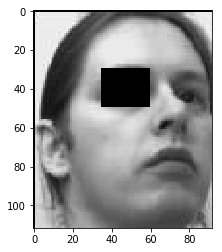

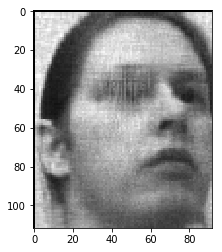

138.430997671 60.8595704834
138.787145152 58.907191709


In [5]:
plt.imshow(X, cmap='gray')
plt.show()
plt.imshow(X*mask, cmap='gray')
plt.show()
plt.imshow(np.dot(T,V), cmap='gray')
plt.show()
print(np.mean(X), np.std(X))
print(np.mean(np.dot(T,V)), np.std(np.dot(T,V)))

(300, 332, 3)


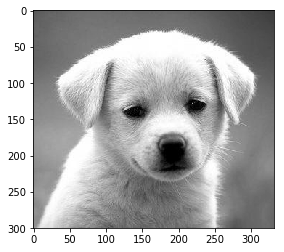

In [8]:
im = Image.open("image/image6.jpg")
data_orig = np.array(im)

print(data_orig.shape)
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])
 
data = rgb2gray(data_orig)    
plt.imshow(data, cmap = 'gray')
plt.show()

In [9]:
#Initialization
X = data.astype(np.uint8)
W = X.shape[0]
K = X.shape[1]
I = 100

data_variance = (np.std(X)/I)**2
data_mean = np.mean(X)/I/2.5

gamma_scale = data_variance/data_mean
gamma_shape = data_mean/gamma_scale

mask = np.ones((W,K)).astype(np.uint8)
mask[100:150,120:160] = 0

T_, V_ = sada_mask(X, mask, W, I, K, gamma_shape, gamma_scale, 1000)

diff - time: 0.8881058692932129 -- epoch 0: loss:  469.338882913
diff - time: 42.78938436508179 -- epoch 50: loss:  409.965013364
diff - time: 41.659525871276855 -- epoch 100: loss:  367.05923584
diff - time: 41.561755895614624 -- epoch 150: loss:  324.695730094
diff - time: 41.457655906677246 -- epoch 200: loss:  288.248721539
diff - time: 41.448007345199585 -- epoch 250: loss:  256.868750385
diff - time: 41.436710834503174 -- epoch 300: loss:  228.863826746
diff - time: 41.401479959487915 -- epoch 350: loss:  208.45209241
diff - time: 41.344091176986694 -- epoch 400: loss:  190.599664679
diff - time: 41.3428258895874 -- epoch 450: loss:  174.269043446
diff - time: 41.2983980178833 -- epoch 500: loss:  156.753043415
diff - time: 41.30152606964111 -- epoch 550: loss:  142.020785708
diff - time: 41.33675479888916 -- epoch 600: loss:  128.176450394
diff - time: 41.27074098587036 -- epoch 650: loss:  118.222457689
diff - time: 41.307090044021606 -- epoch 700: loss:  109.310474622
diff - t

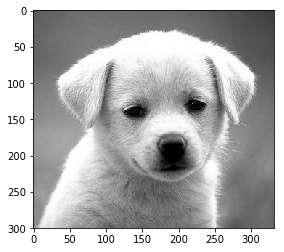

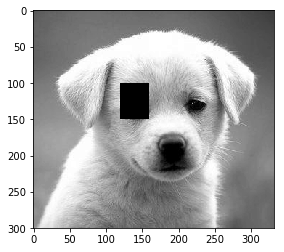

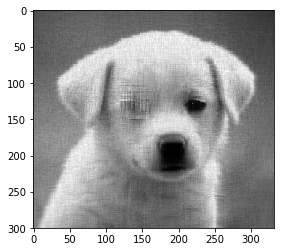

155.46937751 57.0928985274
111.127441451 39.5550147849


In [10]:
plt.imshow(X, cmap='gray')
plt.show()
plt.imshow(X*mask, cmap='gray')
plt.show()
plt.imshow(np.dot(T_,V_), cmap='gray')
plt.show()
print(np.mean(X), np.std(X))
print(np.mean(np.dot(T_,V_)), np.std(np.dot(T_,V_)))

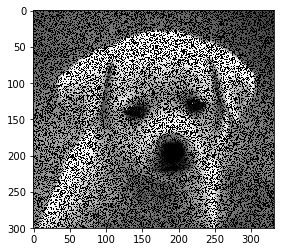

diff - time: 0.7876908779144287 -- epoch 0: loss:  529.493900152
diff - time: 39.773489236831665 -- epoch 50: loss:  442.242728544
diff - time: 38.48647499084473 -- epoch 100: loss:  372.598726498
diff - time: 38.33393883705139 -- epoch 150: loss:  320.093741529
diff - time: 38.538968086242676 -- epoch 200: loss:  279.019294932
diff - time: 38.340384006500244 -- epoch 250: loss:  246.51105807
diff - time: 38.101133823394775 -- epoch 300: loss:  221.604681644
diff - time: 38.0597870349884 -- epoch 350: loss:  200.885922028
diff - time: 38.02014207839966 -- epoch 400: loss:  182.168738448
diff - time: 37.9788978099823 -- epoch 450: loss:  164.712017564
diff - time: 38.67502212524414 -- epoch 500: loss:  151.487220655
diff - time: 38.24993419647217 -- epoch 550: loss:  139.405116082
diff - time: 38.432955741882324 -- epoch 600: loss:  128.649646832
diff - time: 38.11719298362732 -- epoch 650: loss:  120.940134576
diff - time: 37.93455410003662 -- epoch 700: loss:  112.903002109
diff - tim

In [27]:
#Initialization
X = data.astype(np.uint8)
W = X.shape[0]
K = X.shape[1]
I = 100

data_variance = (np.std(X)/I)**2
data_mean = np.mean(X)/I/2.5

gamma_scale = data_variance/data_mean
gamma_shape = data_mean/gamma_scale

pi = 0.60
mask = np.ones((W,K)).astype(np.uint8)
flip = np.random.rand(W,K) < pi
mask = mask * flip
plt.imshow(X*mask, cmap='gray')
plt.show()

T_, V_ = sada_mask(X, mask, W, I, K, gamma_shape, gamma_scale, 1000)

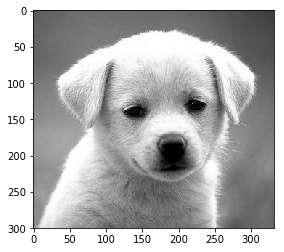

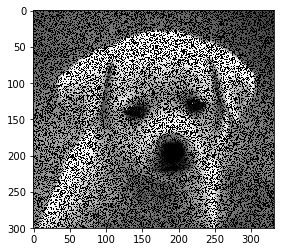

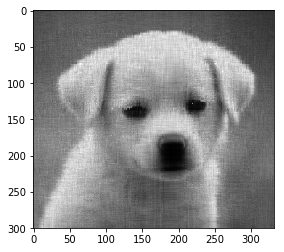

155.46937751 57.0928985274
133.250721043 47.7527201401


In [28]:
plt.imshow(X, cmap='gray')
plt.show()
plt.imshow(X*mask, cmap='gray')
plt.show()
plt.imshow(np.dot(T_,V_), cmap='gray')
plt.show()
print(np.mean(X), np.std(X))
print(np.mean(np.dot(T_,V_)), np.std(np.dot(T_,V_)))